In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def generate_data(m):
    # returns the true w as well as X, Y data

    w = np.random.rand(10)
    norm = np.linalg.norm(w)
    global normalized_w
    normalized_w = w / norm
    training_set = np.zeros((m, 11))
    
    for i in range(m):
        x = np.random.normal(0, 1, 10)
        sigma = sigmoid(np.dot(normalized_w, x))
        y_range = [0, 1]
        y_prob = [1-sigma, sigma]
        y = np.random.choice(a = y_range, p = y_prob)
        training_set[i] = np.append(x,y)
    return training_set

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [5]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_function(m_array):
    average_difference_norm = np.zeros(len(m_array))
    for idx, num in enumerate(m_array):
        difference_norm = np.zeros(10)
        for i in range(10):
            training_set = generate_data(num)
            X = training_set[:, :-1]
            y = training_set[:, -1]
            lr = LogisticRegression(max_iter=1000)
            lr.fit(X, y)
            global normalized_w
            norm = np.linalg.norm(normalized_w - lr.coef_)
            difference_norm[i]= norm
        average_difference_norm[idx] = difference_norm.mean()
    return average_difference_norm

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [34]:
def gradient_descent_with_square_loss(m_array):
    average_difference_norm = np.zeros(len(m_array))
    for idx, num in enumerate(m_array):
        difference_norm = np.zeros(10)
        for i in range(10):
            training_set = generate_data(num)
            X = training_set[:, :-1]
            y = training_set[:, -1]
            
            w_backtick = np.random.randn(10)
            step_size_eta = 0.01
            iterations = 1000
            for j in range(iterations):
                predicted_y = sigmoid(np.dot(X, w_backtick))
                gradient = np.dot(X.T, predicted_y - y)
                gradient /= 10
                gradient *= step_size_eta
                w_backtick -= gradient 
            global normalized_w
            norm = np.linalg.norm(normalized_w - w_backtick)
            difference_norm[i]= norm
        average_difference_norm[idx] = difference_norm.mean()
    return average_difference_norm

array([1.40284895, 0.83816801, 0.6790801 , 0.50121753, 0.52661266])

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [38]:
def stochastic_gradient_descent_with_square_loss(m_array):
    average_difference_norm = np.zeros(len(m_array))
    for idx, num in enumerate(m_array):
        difference_norm = np.zeros(10)
        for i in range(10):
            training_set = generate_data(num)
            X = training_set[:, :-1]
            y = training_set[:, -1]
            
            w_backtick = np.random.randn(10)
            step_size_eta = 0.01
            iterations = 1000
            for j in range(iterations):
                random_point = np.random.randint(num)
                predicted_y = sigmoid(np.dot(X[random_point], w_backtick))
                gradient = np.dot(X[random_point].T, predicted_y - y[random_point])
                gradient *= step_size_eta
                w_backtick -= gradient 
            global normalized_w
            norm = np.linalg.norm(normalized_w - w_backtick)
            difference_norm[i]= norm
        average_difference_norm[idx] = difference_norm.mean()
    return average_difference_norm

array([1.59806499, 0.96317446, 0.94101247, 0.81345178, 0.8947474 ])

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

Time taken for the logistic regression is 0.59375 seconds
Time taken for the gradient descent is 1.5 seconds
Time taken for the stochastic gradient descent is 1.328125 seconds


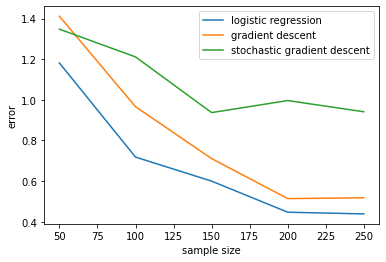

In [51]:
import time

m_array = [50, 100, 150, 200, 250]
result_error = np.zeros((3, len(m_array)))
result_time = np.zeros(3)

start = time.process_time()
result_error[0] = logistic_regression_function(m_array)
result_time[0] = time.process_time() - start

start = time.process_time()
result_error[1] = gradient_descent_with_square_loss(m_array)
result_time[1] = time.process_time() - start

start = time.process_time()
result_error[2] = stochastic_gradient_descent_with_square_loss(m_array)
result_time[2] = time.process_time() - start

plt.plot(m_array, result_error[0])
plt.plot(m_array, result_error[1])
plt.plot(m_array, result_error[2])
plt.xlabel('sample size')
plt.ylabel('error')
plt.legend(('logistic regression', 'gradient descent', 'stochastic gradient descent'))

print(f'Time taken for the logistic regression is {result_time[0]} seconds')
print(f'Time taken for the gradient descent is {result_time[1]} seconds')
print(f'Time taken for the stochastic gradient descent is {result_time[2]} seconds')

# Problem 2

In [52]:
from sklearn import datasets

In [53]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

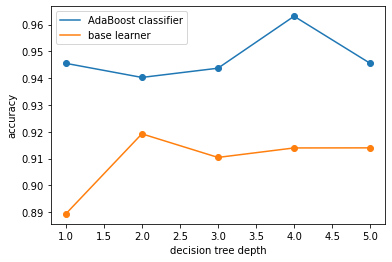

In [66]:
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
depth_range = range(1, 6)
accuracy_adaboost = np.zeros(5)
accuracy_base = np.zeros(5)
X = cancer.data
y = cancer.target
for i in depth_range:
    dtc = tree.DecisionTreeClassifier(max_depth=i, random_state=101)
    ada_boost = ensemble.AdaBoostClassifier(dtc, n_estimators = 10, learning_rate = 1, random_state=101)
    accuracy_base[i-1] = np.mean(cross_val_score(dtc, X, y, cv=10))
    accuracy_adaboost[i-1] = np.mean(cross_val_score(ada_boost, X, y, cv=10))
plt.plot(depth_range, accuracy_adaboost)
plt.plot(depth_range, accuracy_base)
plt.scatter(depth_range, accuracy_adaboost)
plt.scatter(depth_range, accuracy_base)
plt.xlabel('decision tree depth')
plt.ylabel('accuracy')
plt.legend(('AdaBoost classifier', 'base learner'))